# Workshop:Linear Model : Kaggle 주택 가격

* dataset : https://www.kaggle.com/c/house-prices-advanced-regression-techniques
``` python
import os
os.environ['KAGGLE_USERNAME'] = 'yourad'
os.environ['KAGGLE_KEY'] = 'xxxxxxxx'
!kaggle competitions download -c house-prices-advanced-regression-techniques
```

# Q: Data Set 다운로드
* train.svc 파일을 'house_prices.csv'로 이름 바꾸세요.

In [5]:
import os
os.environ['KAGGLE_USERNAME'] = 'your id'
os.environ['KAGGLE_KEY'] = 'your key'

In [6]:
!kaggle competitions download -c house-prices-advanced-regression-techniques


  0%|          | 0.00/199k [00:00<?, ?B/s]
100%|##########| 199k/199k [00:00<00:00, 1.28MB/s]
100%|##########| 199k/199k [00:00<00:00, 1.27MB/s]


# Q: Dataset 읽기
* DataFrame : house_df
* 상위 5개를 출력해 보세요.

In [163]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

house_df = pd.read_csv('house_prices.csv')
house_df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Q: Dataset 의 Meta 정보 살펴보기
* shape
* dtype들의 종류별 갯수 : `df.dtypes.value_counts()`
* NaN 컬럼별 건수 내림차순 정렬

Shape: (1460, 81)
dtype 종류별 갯수:
 object     43
int64      35
float64     3
dtype: int64
결측치 컬럼,건수:
 PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


# Q: 결측치 전처리
* 불필요한 컬럼과 과도한 NaN 컬럼 삭제
    * 'Id','PoolQC' , 'MiscFeature', 'Alley', 'Fence','FireplaceQu'
* 삭제하지 않은 숫자형 컬럼은 평균값으로 채우기
* 결측치 있는 컬럼명과 dtype 출력



결측치 컬럼, dtype :
 MasVnrType      object
BsmtQual        object
BsmtCond        object
BsmtExposure    object
BsmtFinType1    object
BsmtFinType2    object
Electrical      object
GarageType      object
GarageFinish    object
GarageQual      object
GarageCond      object
dtype: object


# 문자형 데이타 One-hot encoding
* df.get_dummies()
* 전후 shape 비교
* 결측치 있는 컬럼 명과 갯수 출력

In [173]:
# df.get_dummies() 사례
fruit = pd.DataFrame({'name':['apple', 'banana', 'cherry', 'durian', None]})
display(fruit)
pd.get_dummies(fruit)

,name
0,apple
1,banana
2,cherry
3,durian
4,None


,name_apple,name_banana,name_cherry,name_durian
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,0,0,0,0


get_dummies() 수행 전 데이터 Shape: (1460, 75)
get_dummies() 수행 후 데이터 Shape: (1460, 271)
결측치 컬럼:
 Series([], dtype: object)


# 데이타 미리 보기


In [177]:
house_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0


# train, test 데이타 분리
* 입력 변수와 출력 변수('SalePrice') 분리
* tain : test = 0.8 : 0.2
    * X_train, X_test, y_train, y_test


# LinearRegress 학습 및 평가
* fit()
* score()

0.8788822410914959

# Ridge 학습 평가

0.8567688817950058

# Lasso 학습 평가

c:\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 221428738982.57028, tolerance: 724013764.6007946
  positive)


0.8823442379002331

# LinearRegression Label, Predict 비교 시각화 
* plt.scatter()
* x=len(y_test)
* y=y_test : c='r', marker='s', alpha=0.5
* y=y_pred : c='b', marker='o', alpha=0.5

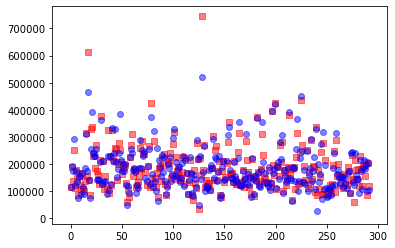

# Ridge Regression Label, Predict 비교 시각화 
* plt.scatter()
* y_test : c='r', marker='s', alpha=0.5
* y_pred : c='b', marker='o', alpha=0.5

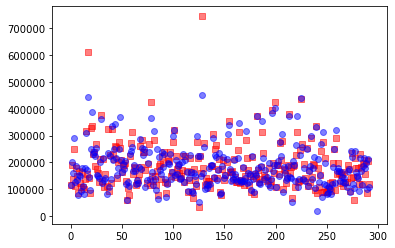

# LassoRegression Label, Predict 비교 시각화 
* plt.scatter()
* y_test : c='r', marker='s', alpha=0.5
* y_pred : c='b', marker='o', alpha=0.5

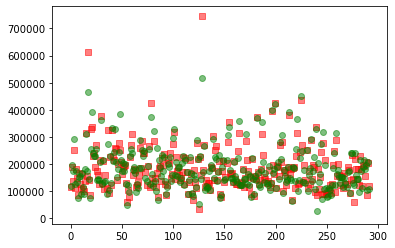